# Imports and Loading Data

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Input, Conv2D, Dense , Flatten, Dropout, GlobalMaxPool2D
from keras.models import Model

In [6]:
#@TODO : Load Data

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

print("x_train.shape : ,", x_train.shape)
print("y_train.shape : ,", y_train.shape)

x_train.shape : , (50000, 32, 32, 3)
y_train.shape : , (50000,)


In [7]:
# Number of classes :
k = len(set(y_train))
print("Number of classes : ", k)

Number of classes :  10


In [8]:
# Building the Model using Keras :


i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)

x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)

model = Model(i, x)

###### Compile and Fit:


model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 19s 11ms/step - loss: 1.5740 - accuracy: 0.4226 - val_loss: 1.2647 - val_accuracy: 0.5436
Epoch 2/15
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2754 - accuracy: 0.5390 - val_loss: 1.1276 - val_accuracy: 0.5923
Epoch 3/15
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1559 - accuracy: 0.5857 - val_loss: 1.0492 - val_accuracy: 0.6320
Epoch 4/15
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0657 - accuracy: 0.6203 - val_loss: 0.9962 - val_accuracy: 0.6488
Epoch 5/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9931 - accuracy: 0.6449 - val_loss: 0.9400 - val_accuracy: 0.6683
Epoch 6/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9330 - accuracy: 0.6665 - val_loss: 0.8975 - val_accuracy: 0.6830
Epoch 7/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8777 - accuracy: 0.6877 - val_loss: 0.8824 -

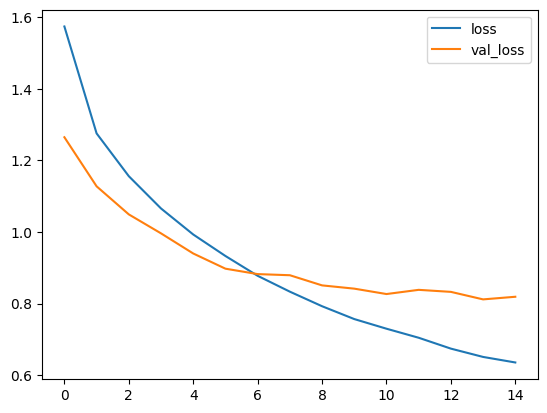

In [9]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

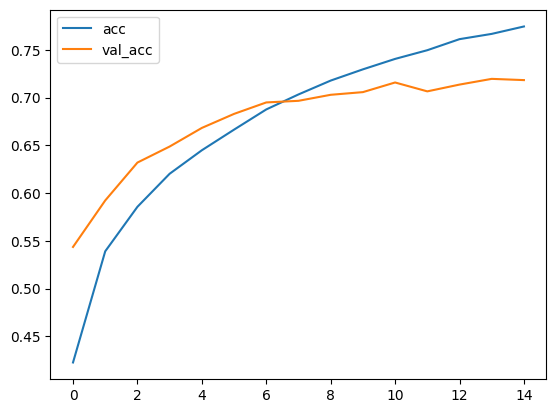

In [10]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

313/313 [==============================] - 1s 2ms/step
 Confusion Matrix, without normalization
[[761  29  24  25  28  12  14  12  58  37]
 [ 15 857   2  11   0   5  13   5  23  69]
 [ 68   6 486  81 129  76  93  41  15   5]
 [ 20   5  19 551  69 189  85  42   9  11]
 [ 17   5  32  79 711  34  65  46  10   1]
 [  9   5  22 185  59 628  36  48   2   6]
 [  4   2  14  58  33  22 852   7   7   1]
 [  8   3  14  50  75  53  11 771   3  12]
 [ 71  42   7  16  12  13   7   7 790  35]
 [ 28  94   4  20   8   9  12  27  21 777]]


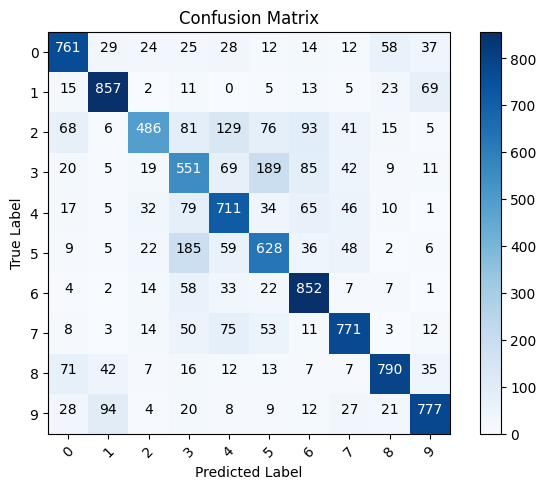

In [11]:
##### Imports :

from sklearn.metrics import confusion_matrix
import itertools

###### End of Imports

def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  """
    This Function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True
  """

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(" Normalized Confusion matrix")
  else:
    print(" Confusion Matrix, without normalization")
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.


  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j], fmt),
        horizontalalignment='center',
        color = "white" if cm[i,j] > thresh else "black"
    )
  
  plt.tight_layout();
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show();

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [13]:
# label mapping:

labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.splitlines()


Text(0.5, 1.0, 'True Label : bird Predicted : deer')

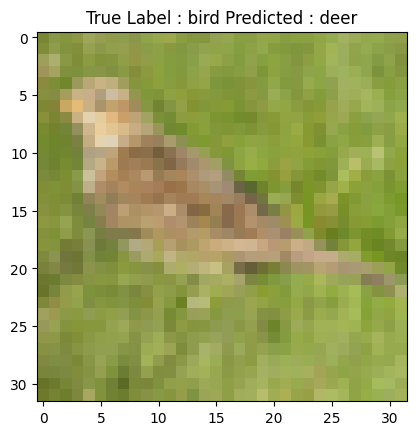

In [15]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True Label : %s Predicted : %s" % (labels[y_test[i]], labels[p_test[i]]))